# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')

In [3]:
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10+', 'ages_10-14',
       'ages_10-16', 'ages_10-21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very Challenging',
       'review_difficulty_Very Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [4]:
df.columns=df.columns.map(lambda x: x.replace('™','').replace('®','').replace('+','plus').replace('-','_').replace(' ','_').replace("'","").replace('.','').replace('½','half'))

In [5]:
df.columns

Index(['piece_count', 'list_price', 'num_reviews', 'play_star_rating',
       'star_rating', 'val_star_rating', 'ages_10plus', 'ages_10_14',
       'ages_10_16', 'ages_10_21',
       ...
       'country_NZ', 'country_PL', 'country_PT', 'country_US',
       'review_difficulty_Average', 'review_difficulty_Challenging',
       'review_difficulty_Easy', 'review_difficulty_Very_Challenging',
       'review_difficulty_Very_Easy', 'review_difficulty_unknown'],
      dtype='object', length=103)

In [6]:
outcome='list_price'
x_cols=[col for col in df.columns]
x_cols.remove('list_price')
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
train, test = train_test_split(df)
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     585.8
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:09:23   Log-Likelihood:                -40396.
No. Observations:                8152   AIC:                         8.098e+04
Df Residuals:                    8058   BIC:                         8.164e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.3481      1.602     39.545      0.000      60.208      66.488
piece_count                                         78.2782      0.872     89.718      0.000      76.568      79.988
num_reviews                                          6.1113      0.664      9.200      0.000       4.809       7.413
play_star_rating                                     5.1460      0.618      8.328      0.000       3.935       6.357
star_rating                                         -1.6372      0.707     -2.317      0.021      -3.022      -0.252
val_star_rating                                     -8.0452      0.631    -12.741      0.000      -9.283      -6.807
ages_10plus                                        123.5648      6.627     18.644      0.000     110.573     136.556
ages_10_14                                         -22.5002      9.585     -2.347      0.019     -41.290      -3.710
ages_10_16                                         -15.0804      3.815     -3.953      0.000     -22.558      -7.602
ages_10_21                                          51.5809      7.621      6.768      0.000      36.642      66.520
ages_11_16                                         -20.2710      5.695     -3.559      0.000     -31.436      -9.106
ages_12plus                                         69.7045      5.290     13.177      0.000      59.335      80.074
ages_12_16                                         -60.6962      6.437     -9.429      0.000     -73.315     -48.077
ages_14plus                                         21.4355      3.920      5.468      0.000      13.751      29.120
ages_16plus                                         32.7588      5.823      5.626      0.000      21.344      44.174
ages_1half_3                                        -8.5005      2.410     -3.526      0.000     -13.226      -3.775
ages_1half_5                                        -4.0324      2.926     -1.378      0.168      -9.768       1.704
ages_2_5                                            15.0783      1.642      9.183      0.000      11.860      18.297
ages_4plus                                         -17.2021      6.566     -2.620      0.009     -30.073      -4.331
ages_4_7                                            -6.3779      3.200     -1.993      0.046     -12.650      -0.106
ages_4_99                                           -3.3303      3.694     -0.902      0.367     -10.571       3.910
ages_5plus                                          -9.1883      2.881     -3.190      0.001     -14.835      -3.542
ages_5_12                                          -32.9417      2.959    -11.134      0.000     -38.741     -27.142
ages_5_8                                 

Train, test is a way to split large datasets
Can split into 2 DFs or use train, test method, as it guides us to do here.
For the age ranges, it would make sense to remove some of them and not others.
For theme names, it is up to us. If a dummy variable only has 2 observations out of the 10,870, that would be acceptable to remove.

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [7]:
# Your code here - Remove features which do not appear to be statistically relevant
#star_rating (play_star_rating and val_star_rating multicolinearity issues, p-value>.05),ages 1.5-5, 
#ages 4-7, ages 4-99, ages 5-8, ages 6-14, ages 7+, ages 9-16, Angry Birds, Creator_3_in_1, Super_Hero_Girls,
#DUPLO, Elves, Friends, Juniors, Jurassic_Park_Velociraptor_Chase, NEXO_KNIGHTS, Power_Functions, Pteranodon_Chase,
#Speed_Champions, THE_LEGO_BATMAN_MOVIE, Technic, country_AT, country_AU, country_CH, country_FR, country_FR,
#country_IE...

In [8]:
summary = model.summary()
p_table = summary.tables[1]
p_table

<class 'statsmodels.iolib.table.SimpleTable'>

In [9]:
print(type(p_table))

<class 'statsmodels.iolib.table.SimpleTable'>


In [21]:
p_table_df = pd.DataFrame(p_table.data)

In [22]:
p_table_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       104 non-null    object
 1   1       104 non-null    object
 2   2       104 non-null    object
 3   3       104 non-null    object
 4   4       104 non-null    object
 5   5       104 non-null    object
 6   6       104 non-null    object
dtypes: object(7)
memory usage: 5.8+ KB


In [23]:
p_table_df.head()

0           1          2          3       4          5  \
0                          coef    std err          t   P>|t|     [0.025   
1         Intercept     63.3481      1.602     39.545   0.000     60.208   
2       piece_count     78.2782      0.872     89.718   0.000     76.568   
3       num_reviews      6.1113      0.664      9.200   0.000      4.809   
4  play_star_rating      5.1460      0.618      8.328   0.000      3.935   

           6  
0     0.975]  
1     66.488  
2     79.988  
3      7.413  
4      6.357

In [28]:
p_table_df.columns=['column','coef','std err','t','P>|t|','0.025','0.975']

In [29]:
p_table_df.head(2)

column        coef    std err          t   P>|t|      0.025      0.975
0                   coef    std err          t   P>|t|     [0.025     0.975]
1  Intercept     63.3481      1.602     39.545   0.000     60.208     66.488

In [31]:
p_table_df.drop(labels=0,axis=0,inplace=True)

In [33]:
p_table_df.set_index('column',inplace=True)

In [35]:
p_table_df['P>|t|'] = p_table_df['P>|t|'].astype(float)

In [36]:
p_table_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 103 entries, Intercept to review_difficulty_unknown
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   coef     103 non-null    object 
 1   std err  103 non-null    object 
 2   t        103 non-null    object 
 3   P>|t|    103 non-null    float64
 4   0.025    103 non-null    object 
 5   0.975    103 non-null    object 
dtypes: float64(1), object(5)
memory usage: 5.6+ KB


In [37]:
p_table_df['pass']=p_table_df['P>|t|'].map(lambda x: x<=.05)

In [39]:
p_table_df.head(2)

coef    std err          t  P>|t|      0.025      0.975  \
column                                                                       
Intercept       63.3481      1.602     39.545    0.0     60.208     66.488   
piece_count     78.2782      0.872     89.718    0.0     76.568     79.988   

             pass  
column             
Intercept    True  
piece_count  True

In [43]:
pass_list=list(p_table_df[p_table_df['pass']==True].index)

In [44]:
pass_list

['Intercept',
 'piece_count',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10plus',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12plus',
 'ages_12_16',
 'ages_14plus',
 'ages_16plus',
 'ages_1half_3',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_5plus',
 'ages_5_12',
 'ages_6plus',
 'ages_6_12',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'theme_name_Architecture',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_BrickHeadz',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DIMENSIONS',
 'theme_name_Dilophosaurus_Outpost_Attack',
 'theme_name_Disney',
 'theme_name_Ghostbusters',
 'theme_name_Ideas',
 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate',
 'theme_name_Marvel_Super_Heroes',
 'theme_name_

In [45]:
outcome='list_price'
x_cols=pass_list
x_cols.remove('Intercept')
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
train, test = train_test_split(df)
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     663.4
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:25:38   Log-Likelihood:                -40613.
No. Observations:                8152   AIC:                         8.138e+04
Df Residuals:                    8077   BIC:                         8.190e+04
Df Model:                          74                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.9592      2.744     23.676      0.000      59.581      70.337
piece_count                                         78.6383      0.887     88.613      0.000      76.899      80.378
num_reviews                                          6.4809      0.660      9.826      0.000       5.188       7.774
play_star_rating                                     5.4481      0.617      8.830      0.000       4.239       6.658
star_rating                                         -1.5064      0.707     -2.131      0.033      -2.892      -0.121
val_star_rating                                     -8.2737      0.612    -13.521      0.000      -9.473      -7.074
ages_10plus                                        128.1192      5.033     25.456      0.000     118.253     137.985
ages_10_14                                         -19.7765      8.637     -2.290      0.022     -36.708      -2.845
ages_10_16                                         -12.5187      4.277     -2.927      0.003     -20.902      -4.136
ages_10_21                                          42.6762      3.712     11.497      0.000      35.400      49.952
ages_11_16                                         -20.2853      6.172     -3.287      0.001     -32.383      -8.187
ages_12plus                                         70.3636      6.385     11.019      0.000      57.846      82.881
ages_12_16                                         -66.0074      7.202     -9.165      0.000     -80.126     -51.889
ages_14plus                                         30.6804      4.758      6.448      0.000      21.353      40.007
ages_16plus                                         26.3752      6.985      3.776      0.000      12.683      40.067
ages_1half_3                                        -3.0938      3.706     -0.835      0.404     -10.359       4.172
ages_2_5                                            21.6840      2.694      8.049      0.000      16.403      26.965
ages_4plus                                         -13.4149     10.045     -1.335      0.182     -33.106       6.277
ages_4_7                                            -2.0804      2.820     -0.738      0.461      -7.609       3.448
ages_5plus                                          -7.6932      3.349     -2.297      0.022     -14.258      -1.129
ages_5_12                                          -28.7529      3.215     -8.944      0.000     -35.055     -22.451
ages_6plus                                         -21.7346      5.714     -3.804      0.000     -32.935     -10.534
ages_6_12                                          -17.8811      2.559     -6.987      0.000     -22.898     -12.864
ages_7plus                               

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [50]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_list=list(zip(x_cols, vif))

/srv/conda/envs/notebook/lib/python3.8/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [52]:
vif_subset=[]
for x in vif_list:
    if x[1]<=5:
        vif_subset.append(x[0])

In [55]:
len(vif_subset)

67

In [56]:
len(vif_list)

75

In [57]:
vif_subset

['piece_count',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12_16',
 'ages_14plus',
 'ages_1half_3',
 'ages_2_5',
 'ages_4plus',
 'ages_4_7',
 'ages_5_12',
 'ages_6plus',
 'ages_6_12',
 'ages_7plus',
 'ages_7_12',
 'ages_7_14',
 'ages_8plus',
 'ages_8_12',
 'ages_8_14',
 'ages_9plus',
 'ages_9_12',
 'ages_9_14',
 'theme_name_BOOST',
 'theme_name_Blues_Helicopter_Pursuit',
 'theme_name_Carnotaurus_Gyrosphere_Escape',
 'theme_name_City',
 'theme_name_Classic',
 'theme_name_Creator_Expert',
 'theme_name_DC_Comics_Super_Heroes',
 'theme_name_DIMENSIONS',
 'theme_name_Dilophosaurus_Outpost_Attack',
 'theme_name_Disney',
 'theme_name_Ghostbusters',
 'theme_name_Ideas',
 'theme_name_Indoraptor_Rampage_at_Lockwood_Estate',
 'theme_name_Marvel_Super_Heroes',
 'theme_name_Minecraft',
 'theme_name_NINJAGO',
 'theme_name_SERIOUS_PLAY',
 'theme_name_Star_Wars',
 'theme_name_Stygimoloch_Breakout',
 'theme

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [58]:
# Your code here - Subset features based on multicollinearity
outcome='list_price'
x_cols=vif_subset
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
train, test = train_test_split(df)
model=ols(formula=formula,data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     676.1
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        17:47:31   Log-Likelihood:                -40899.
No. Observations:                8152   AIC:                         8.193e+04
Df Residuals:                    8084   BIC:                         8.241e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           77.7694      1.568     49.593      0.000      74.695      80.843
piece_count                                         79.3825      0.701    113.190      0.000      78.008      80.757
num_reviews                                          3.8580      0.660      5.842      0.000       2.563       5.153
play_star_rating                                     7.5403      0.574     13.134      0.000       6.415       8.666
star_rating                                         -3.1879      0.719     -4.435      0.000      -4.597      -1.779
val_star_rating                                     -8.8522      0.620    -14.276      0.000     -10.068      -7.637
ages_10_14                                         -29.5302      9.317     -3.170      0.002     -47.794     -11.267
ages_10_16                                         -12.5688      3.712     -3.386      0.001     -19.846      -5.292
ages_10_21                                          37.4882      3.486     10.754      0.000      30.655      44.322
ages_11_16                                         -30.0413      5.463     -5.499      0.000     -40.750     -19.333
ages_12_16                                         -72.6190      6.706    -10.829      0.000     -85.764     -59.474
ages_14plus                                         11.6881      3.738      3.127      0.002       4.361      19.016
ages_1half_3                                        -5.4470      3.321     -1.640      0.101     -11.956       1.062
ages_2_5                                            17.6726      2.123      8.324      0.000      13.511      21.834
ages_4plus                                          -6.2885      9.575     -0.657      0.511     -25.057      12.480
ages_4_7                                            -5.2372      2.330     -2.248      0.025      -9.804      -0.670
ages_5_12                                          -37.1256      2.833    -13.105      0.000     -42.679     -31.572
ages_6plus                                         -25.4492      5.803     -4.386      0.000     -36.824     -14.074
ages_6_12                                          -22.5488      1.915    -11.774      0.000     -26.303     -18.795
ages_7plus                                         -17.4977     36.839     -0.475      0.635     -89.712      54.717
ages_7_12                                          -19.2854      2.301     -8.382      0.000     -23.796     -14.775
ages_7_14                                          -16.6710      2.026     -8.229      0.000     -20.643     -12.700
ages_8plus                                          -2.1566      4.616     -0.467      0.640     -11.205       6.891
ages_8_12                                

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

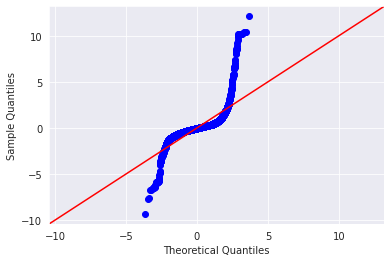

In [59]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

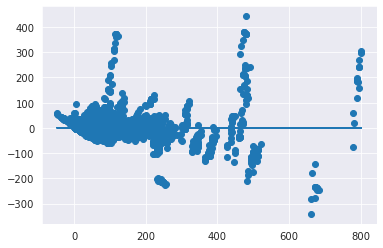

In [61]:
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

In [63]:
#Removing outliers
for i in range(90, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, train['list_price'].quantile(q=q)))

0.9 percentile: 146.339
0.91 percentile: 155.87
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 199.99
0.95 percentile: 220.87
0.96 percentile: 251.88
0.97 percentile: 288.25289399999957
0.98 percentile: 350.9721559999996
0.99 percentile: 450.2771219999995


In [64]:
subset=train[train['list_price']<=252]

In [65]:
len(subset)

7831

In [66]:
outcome='list_price'
x_cols=vif_subset
predictors='+'.join(x_cols)
formula=outcome+'~'+predictors
model=ols(formula=formula,data=subset).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     793.5
Date:                Tue, 10 Nov 2020   Prob (F-statistic):               0.00
Time:                        18:00:47   Log-Likelihood:                -33311.
No. Observations:                7831   AIC:                         6.676e+04
Df Residuals:                    7763   BIC:                         6.723e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           63.7654      0.784     81.376      0.000      62.229      65.301
piece_count                                         75.8413      0.707    107.234      0.000      74.455      77.228
num_reviews                                         -0.9149      0.380     -2.407      0.016      -1.660      -0.170
play_star_rating                                     4.3275      0.274     15.788      0.000       3.790       4.865
star_rating                                         -1.4269      0.338     -4.218      0.000      -2.090      -0.764
val_star_rating                                     -5.1505      0.292    -17.647      0.000      -5.723      -4.578
ages_10_14                                           1.5058      4.371      0.345      0.730      -7.062      10.073
ages_10_16                                           7.1638      1.871      3.830      0.000       3.497      10.831
ages_10_21                                          43.2890      1.652     26.204      0.000      40.051      46.527
ages_11_16                                         -48.3569      3.411    -14.175      0.000     -55.044     -41.670
ages_12_16                                          12.4030      4.741      2.616      0.009       3.110      21.696
ages_14plus                                         15.5203      2.781      5.582      0.000      10.070      20.971
ages_1half_3                                         2.9955      1.558      1.922      0.055      -0.059       6.050
ages_2_5                                            26.0754      1.004     25.963      0.000      24.107      28.044
ages_4plus                                          12.3989      4.588      2.702      0.007       3.405      21.393
ages_4_7                                             3.4144      1.096      3.115      0.002       1.266       5.563
ages_5_12                                          -28.8525      1.354    -21.308      0.000     -31.507     -26.198
ages_6plus                                         -24.2119      2.740     -8.835      0.000     -29.584     -18.840
ages_6_12                                          -10.2064      0.915    -11.154      0.000     -12.000      -8.413
ages_7plus                                          -3.8606     17.180     -0.225      0.822     -37.538      29.817
ages_7_12                                           -6.6664      1.093     -6.099      0.000      -8.809      -4.524
ages_7_14                                           -7.1642      0.963     -7.439      0.000      -9.052      -5.276
ages_8plus                                           9.3278      2.256      4.134      0.000       4.905      13.750
ages_8_12                                

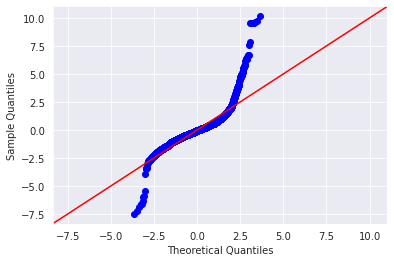

In [67]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

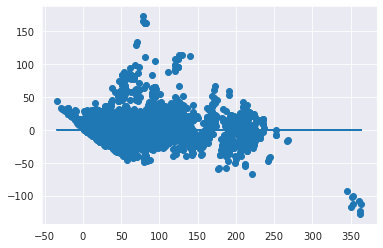

In [69]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(subset[x_cols]), model.resid)
plt.plot(model.predict(subset[x_cols]), [0 for i in range(len(subset))])

## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 